Import the necessary libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

In [16]:
# Simulate data
n = 9001
control_var1 = np.random.normal(10, 5, n)  # Control group
variant_var1 = np.random.normal(12, 5, n)  # Variant group

In [17]:
# Create DataFrame for control and variant groups
control_df = pd.DataFrame({'var1': control_var1, 'is_control': 0})
variant_df = pd.DataFrame({'var1': variant_var1, 'is_control': 1})



In [34]:
# Concatenate the control and variant DataFrames
sim_df = pd.concat([control_df, variant_df], ignore_index=True)

In [35]:
# Sample a subset for A/B testing
n_samples = 200
samples_df = sim_df.sample(n_samples, random_state=seed)

In [36]:
# Split samples into control and variant groups
control_group = samples_df[samples_df.is_control == 0]['var1']
variant_group = samples_df[samples_df.is_control == 1]['var1']


In [37]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(control_group, variant_group, equal_var=False)


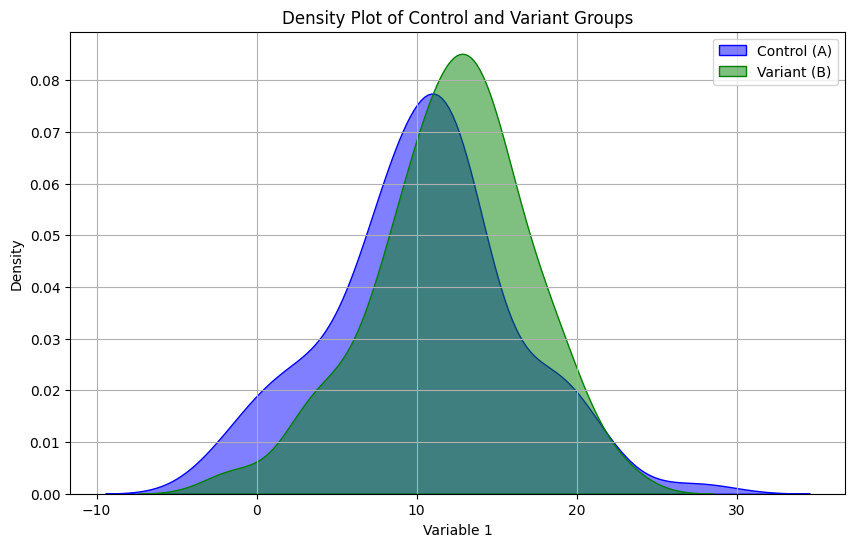

In [38]:
# Plotting the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(control_group, label='Control (A)', fill=True, color='blue', alpha=0.5)
sns.kdeplot(variant_group, label='Variant (B)', fill=True, color='green', alpha=0.5)
plt.xlabel('Variable 1')
plt.ylabel('Density')
plt.title('Density Plot of Control and Variant Groups')
plt.legend()
plt.grid()
plt.show()



In [39]:
# Output basic statistics and hypothesis testing results
print("\nBasic Statistics:")
print(f"Control Group Mean: {np.mean(control_group):.2f}, Std Dev: {np.std(control_group, ddof=1):.2f}")
print(f"Variant Group Mean: {np.mean(variant_group):.2f}, Std Dev: {np.std(variant_group, ddof=1):.2f}")

print("\nHypothesis Testing:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


Basic Statistics:
Control Group Mean: 10.33, Std Dev: 5.73
Variant Group Mean: 12.12, Std Dev: 4.79

Hypothesis Testing:
T-statistic: -2.3864, P-value: 0.0180


In [40]:
# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject null hypothesis. There is a significant difference between groups A and B.")
else:
    print("\nConclusion: Fail to reject null hypothesis. There is no significant difference between groups A and B.")


Conclusion: Reject null hypothesis. There is a significant difference between groups A and B.
